In [1]:
import pandas as pd
# import nltk
# from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
# nltk.download('punkt')
# Download NLTK resources (including stopwords for Vietnamese)
# nltk.download('stopwords')

In [2]:
df = pd.read_csv("nlp_for_all_news_data.csv")
df

,Unnamed: 0,Published_date,news_content,roberta_neg,roberta_pos,roberta_neu,vader_neg,vader_neu,vader_pos,vader_compound
0,0,2020-01-01,Đầu tư dài hạn vào doanh nghiệp chưa niêm yết ...,0.587031,0.276965,0.136004,0.0,1.000,0.000,0.0000
1,1,2020-01-02,Ông Trịnh Văn Quyết vào top 3 người giàu trên ...,0.008298,0.917595,0.074107,0.0,0.957,0.043,0.3818
2,2,2020-01-03,"Trung Quốc bơm 115 tỷ USD, chứng khoán thế giớ...",0.133858,0.373538,0.492604,0.0,1.000,0.000,0.0000
3,3,2020-01-04,Chứng khoán Mỹ trượt khỏi đỉnh vì tin xấu từ T...,0.968832,0.009985,0.021183,0.0,1.000,0.000,0.0000
4,4,2020-01-05,"Cuối năm, một loạt công ty chứng khoán bị phạt...",0.026826,0.924794,0.048380,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
1304,1304,2024-02-21,VinaCapital: Lợi nhuận doanh nghiệp sẽ tăng 50...,0.003374,0.983424,0.013202,0.0,1.000,0.000,0.0000
1305,1305,2024-02-22,"Nhóm Dragon Capital bán tiếp 1 triệu cp GEX, c...",0.647978,0.170457,0.181565,0.0,1.000,0.000,0.0000
1306,1306,2024-02-23,Chứng khoán Mỹ xanh rực nhờ cổ phiếu chip Nvid...,0.032217,0.877634,0.090149,0.0,1.000,0.000,0.0000
1307,1307,2024-02-24,Thị trường chứng khoán diễn biến ra sao sau ng...,0.984123,0.005331,0.010546,0.0,1.000,0.000,0.0000


In [3]:
from underthesea import word_tokenize, pos_tag
import re
def preprocess_text(text):
    cleaned_text = re.sub(r'[^a-zA-ZÀ-ỹ ]', '', text.lower())
    words = word_tokenize(cleaned_text)
    return words

def remove_stopwords(words, stopwords):
    return [word for word in words if word not in stopwords]

def filter_meaningful_words(words):
    pos_tags = pos_tag(" ".join(words))
    meaningful_words = [word for word, pos in pos_tags if pos.startswith('N')]
    return meaningful_words

def calculate_word_frequencies(words):
    word_frequencies = Counter(words)
    return word_frequencies
    # filtered_tokens = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    # return Counter(filtered_tokens)

In [4]:
# Concatenate all text in the 'news_content' column
all_text = ' '.join(df['news_content'].astype(str).tolist())

# Preprocess text
processed_words = preprocess_text(all_text)
# Check the data type and content of processed_words
print(type(processed_words))
# print(processed_words)
# Remove stopwords
stopwords = ["và", "là", "với", "của", "làm", "có", "trong", "ngày","tháng","năm","nam","cho", "từ","trên","đã", 'lại', "như thế",
             "các","khi","được","hơn","sẽ","những","vào","bị"]

filtered_words = remove_stopwords(processed_words, stopwords)

# Filter meaningful words based on part-of-speech tagging
meaningful_words = filter_meaningful_words(filtered_words)

# Calculate word frequencies for the entire column
word_frequencies = calculate_word_frequencies(meaningful_words)

# Extract the top 12 words
top_words = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:20])

# Display the top 12 words and their frequencies
print("Top 20 words and their frequencies:")
for word, freq in top_words.items():
    print(f"{word}: {freq}")

# # Plot the top 12 word frequency distribution
# plt.bar(top_words.keys(), top_words.values())
# plt.xlabel('Words')
# plt.ylabel('Frequency')
# plt.title('Top 12 Word Frequencies')
# plt.show()

<class 'list'>


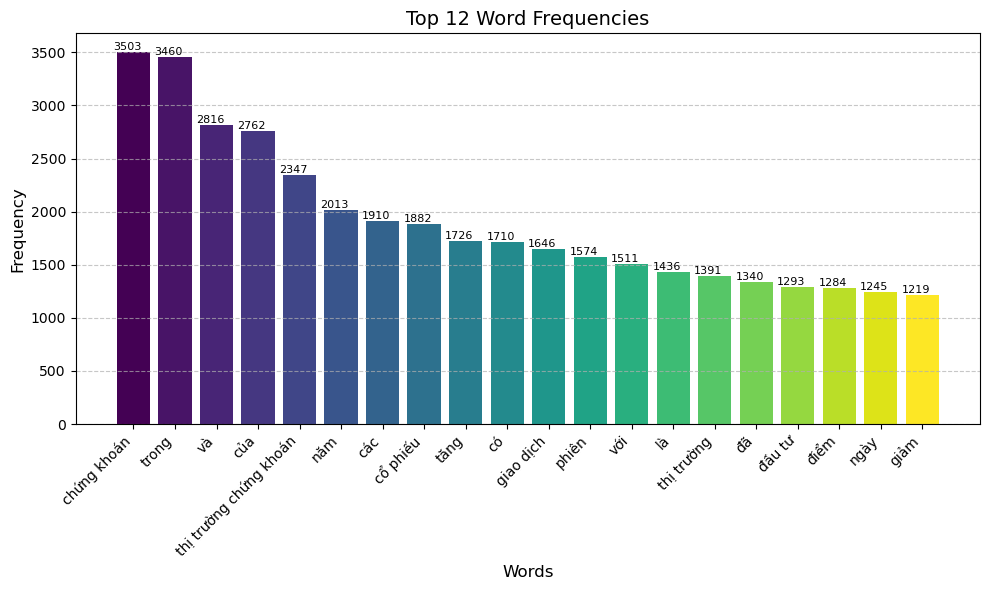

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assume you already have the word frequencies calculated and stored in the 'top_words' dictionary

# Set a color palette for the bars
colors = plt.cm.viridis(np.linspace(0, 1, len(top_words)))

# Plot the top 12 word frequency distribution
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.bar(top_words.keys(), top_words.values(), color=colors)

# Add data labels on top of the bars
for bar, freq in zip(bars, top_words.values()):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(freq), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 12 Word Frequencies', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Save the plot as an image file if needed
# plt.savefig('top_word_frequencies.png', dpi=300)

# Display the plot
plt.show()
